In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
print(os.listdir('/kaggle/input/titanic'))
base_dir = '/kaggle/input/titanic'

data_gender = pd.read_csv(base_dir + '/gender_submission.csv')
data_gender.head()
data_gender.shape

['train.csv', 'test.csv', 'gender_submission.csv']


(418, 2)

In [3]:
data = pd.read_csv(base_dir + '/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# checking for null values in the dataset
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Performing EDA



# Checking data where age is nan
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [6]:
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
data[data['Cabin'].isna() & data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
# Let's try to plot male vs female survival ratio

data_survival_gender = pd.crosstab(data['Sex'], data['Survived'])
data_survival_gender

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='count'>

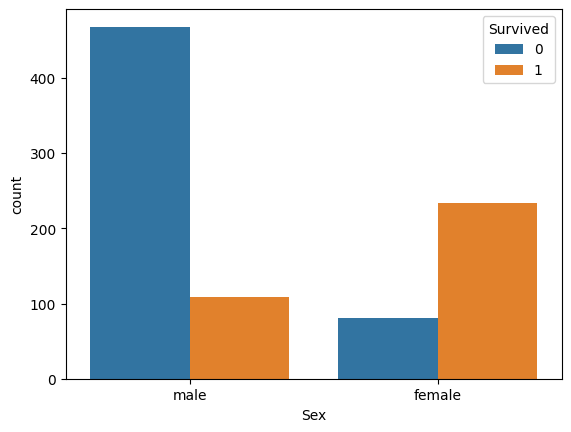

In [9]:
sns.countplot(data=data, x='Sex', hue='Survived')

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


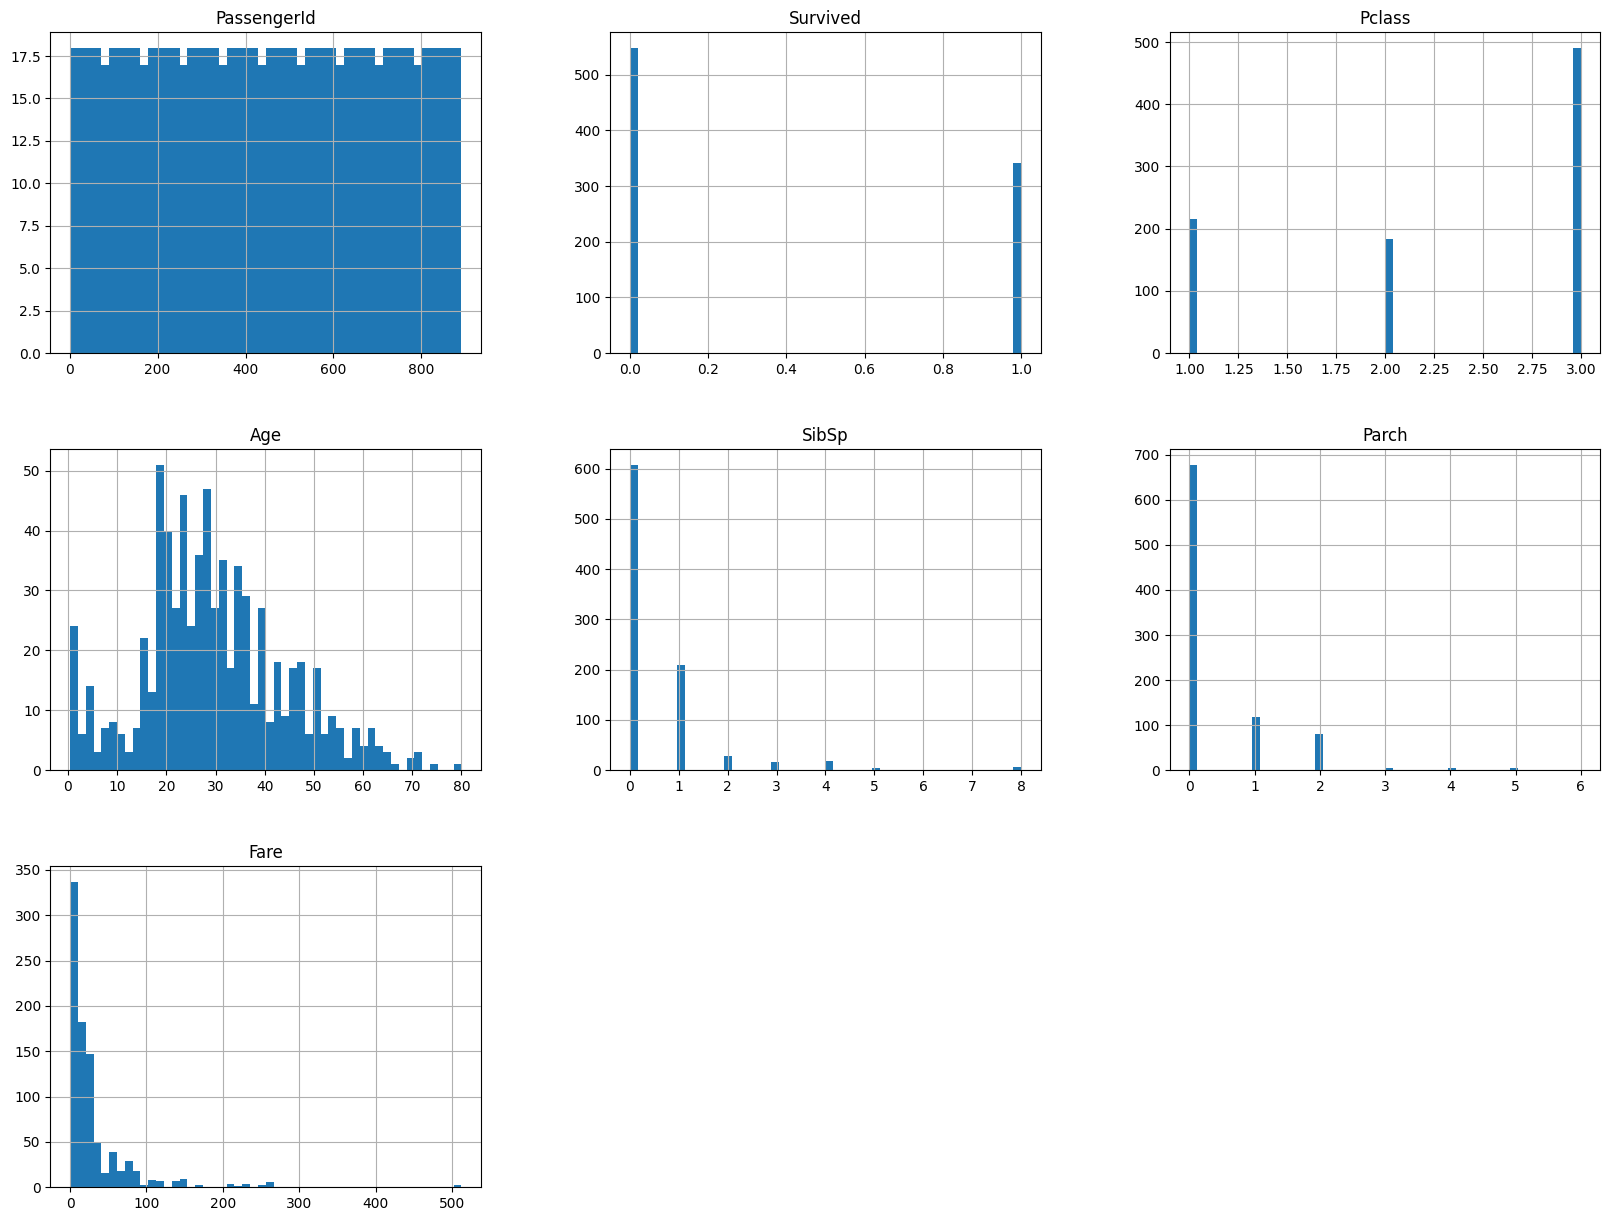

In [11]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
y_train = data['Survived']
X_train = data.drop(columns=['Survived'])
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Embarked', ylabel='count'>

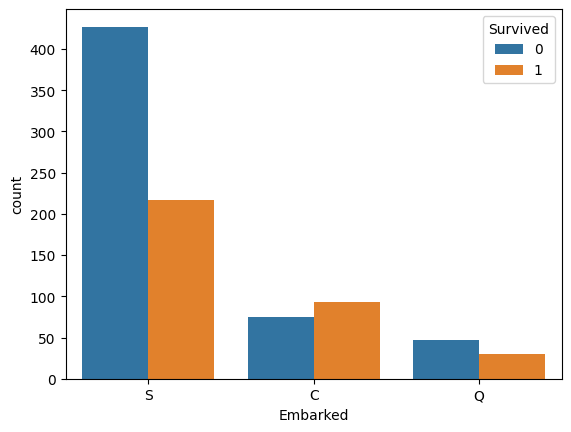

In [16]:
# survival rate based on embarking port
sns.countplot(data=data, x='Embarked', hue='Survived')

In [17]:
data.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='Age'>

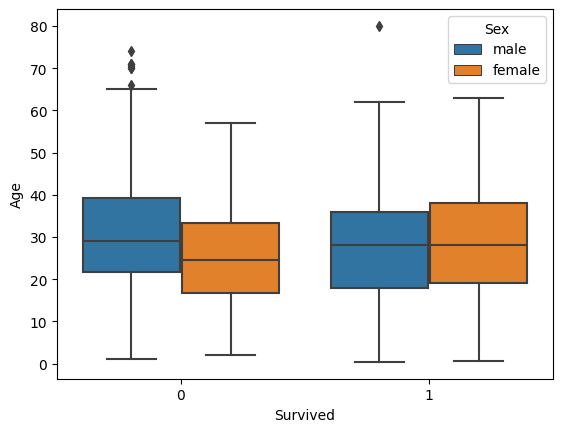

In [18]:
# checking survival rate based on age
sns.boxplot(data=data, x='Survived', y='Age', hue='Sex')

In [19]:
data[data['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
data[data['Age'].isna() == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

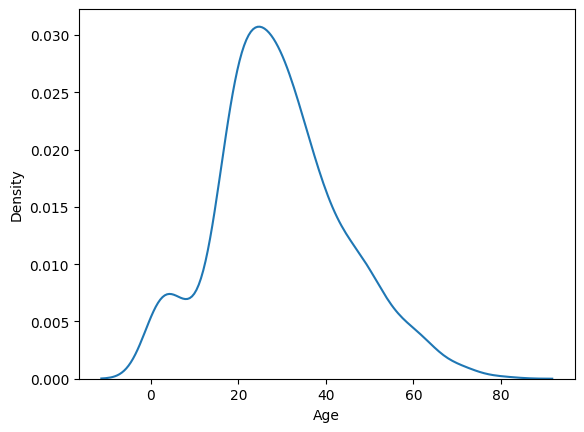

In [21]:
sns.kdeplot(data=data[data['Age'].isna() == False], x='Age',)

In [22]:
data_young = data[(data['Age'] >= 20) & (data['Age'] <= 30)]

<Axes: xlabel='Survived', ylabel='Age'>

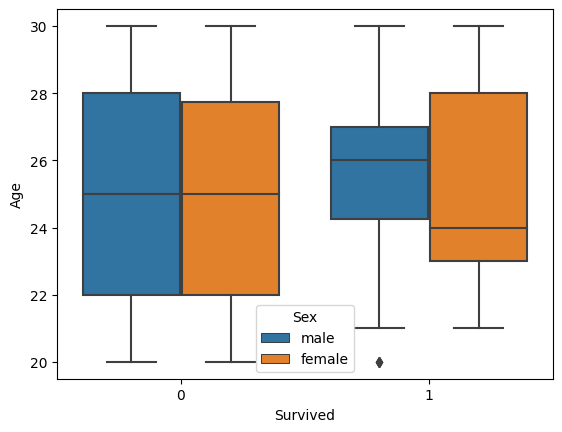

In [23]:
sns.boxplot(data=data_young, x='Survived', y='Age', hue='Sex')

In [24]:
data_old = data[data['Age'] > 40]
data_old.shape

(150, 12)

<Axes: xlabel='Survived', ylabel='Age'>

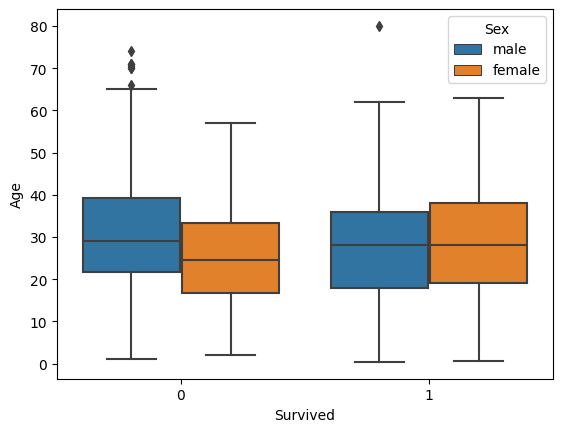

In [25]:
sns.boxplot(data=data, x='Survived', y='Age', hue='Sex')

In [26]:
# get the test files
data_test = pd.read_csv(base_dir + '/test.csv')
data_test.shape

(418, 11)

In [27]:


data['Age'].fillna(data['Age'].mean(), inplace=True)

data.isna().sum()

/tmp/ipykernel_17/2179221984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# feature engineering 
data['AgeClass'] = data['Age']*data['Pclass']
data['family_size'] = data['SibSp'] + data['Parch']
data['Fare_per_person'] = data['Fare']/(data['family_size'] + 1)

data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,66.000000,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38.000000,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,78.000000,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35.000000,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,105.000000,0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,54.000000,0,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,19.000000,0,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,89.097353,3,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,26.000000,0,30.00000


In [29]:
data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
AgeClass             0
family_size          0
Fare_per_person      0
dtype: int64

In [30]:

data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)


data_test['Fare'].fillna(data_test['Fare'].mean(), inplace=True)

data_test.isna().sum()

/tmp/ipykernel_17/2004768351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
/tmp/ipykernel_17/2004768351.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:

data_test['AgeClass'] = data_test['Age']*data_test['Pclass']
data_test['family_size'] = data_test['SibSp'] + data_test['Parch']
data_test['Fare_per_person'] = data_test['Fare']/(data_test['family_size'] + 1)

data_test
data_test.isna().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
AgeClass             0
family_size          0
Fare_per_person      0
dtype: int64

In [32]:

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    print(big_string)
    return np.nan


title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2,66.000000,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,38.000000,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,78.000000,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2,35.000000,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2,105.000000,0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,2,54.000000,0,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2,19.000000,0,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,2,89.097353,3,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0,26.000000,0,30.00000


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_test['Embarked'] = le.fit_transform(data_test['Embarked'])

data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,1,103.500000,0,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,2,141.000000,1,3.500000
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,1,124.000000,0,9.687500
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,2,81.000000,0,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,2,66.000000,2,4.095833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,2,90.817771,0,8.050000
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,0,39.000000,0,108.900000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,115.500000,0,7.250000
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,2,90.817771,0,8.050000


In [35]:
data['Title']=data['Name'].map(lambda x: substrings_in_string(x, title_list))
data['Title']=data.apply(replace_titles, axis=1)

data_test['Title']=data_test['Name'].map(lambda x: substrings_in_string(x, title_list))
data_test['Title']=data_test.apply(replace_titles, axis=1)

In [36]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,1,103.500000,0,7.829200,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,2,141.000000,1,3.500000,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,1,124.000000,0,9.687500,Mr
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,2,81.000000,0,8.662500,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,2,66.000000,2,4.095833,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,2,90.817771,0,8.050000,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,0,39.000000,0,108.900000,Mr
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,115.500000,0,7.250000,Mr
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,2,90.817771,0,8.050000,Mr


In [37]:
data['Title'] = le.fit_transform(data['Title'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2,66.000000,1,3.62500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,38.000000,1,35.64165,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,78.000000,0,7.92500,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2,35.000000,1,26.55000,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2,105.000000,0,8.05000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,2,54.000000,0,13.00000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2,19.000000,0,30.00000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,2,89.097353,3,5.86250,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0,26.000000,0,30.00000,2


In [38]:
data_test['Title'] = le.fit_transform(data_test['Title'])
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,1,103.500000,0,7.829200,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,2,141.000000,1,3.500000,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,1,124.000000,0,9.687500,2
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,2,81.000000,0,8.662500,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,2,66.000000,2,4.095833,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,2,90.817771,0,8.050000,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,0,39.000000,0,108.900000,2
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,115.500000,0,7.250000,2
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,2,90.817771,0,8.050000,2


In [39]:
data['isMale'] = [1 if sex == 'male' else 0 for sex in data['Sex']]

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2,66.000000,1,3.62500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,38.000000,1,35.64165,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,78.000000,0,7.92500,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2,35.000000,1,26.55000,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2,105.000000,0,8.05000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,2,54.000000,0,13.00000,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2,19.000000,0,30.00000,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,2,89.097353,3,5.86250,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0,26.000000,0,30.00000,2,1


In [40]:
data_test['isMale'] = [1 if sex == 'male' else 0 for sex in data_test['Sex']]

data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,1,103.500000,0,7.829200,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,2,141.000000,1,3.500000,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,1,124.000000,0,9.687500,2,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,2,81.000000,0,8.662500,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,2,66.000000,2,4.095833,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,2,90.817771,0,8.050000,2,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,0,39.000000,0,108.900000,2,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,115.500000,0,7.250000,2,1
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,2,90.817771,0,8.050000,2,1


In [41]:
data['hadCabin'] = data['Cabin'].notna().astype(int)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2,66.000000,1,3.62500,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,38.000000,1,35.64165,3,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,78.000000,0,7.92500,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2,35.000000,1,26.55000,3,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2,105.000000,0,8.05000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,2,54.000000,0,13.00000,2,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2,19.000000,0,30.00000,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,2,89.097353,3,5.86250,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0,26.000000,0,30.00000,2,1,1


In [42]:
data_test['hadCabin'] = data_test['Cabin'].notna().astype(int)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,1,103.500000,0,7.829200,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,2,141.000000,1,3.500000,3,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,1,124.000000,0,9.687500,2,1,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,2,81.000000,0,8.662500,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,2,66.000000,2,4.095833,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,2,90.817771,0,8.050000,2,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,0,39.000000,0,108.900000,2,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,115.500000,0,7.250000,2,1,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,2,90.817771,0,8.050000,2,1,0


In [43]:
X_test = data_test.drop(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Name', 'Cabin', 'Ticket', 'Sex'])
X_test

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,1,103.500000,0,7.829200,2,1,0
1,2,141.000000,1,3.500000,3,0,0
2,1,124.000000,0,9.687500,2,1,0
3,2,81.000000,0,8.662500,2,1,0
4,2,66.000000,2,4.095833,3,0,0
...,...,...,...,...,...,...,...
413,2,90.817771,0,8.050000,2,1,0
414,0,39.000000,0,108.900000,2,0,1
415,2,115.500000,0,7.250000,2,1,0
416,2,90.817771,0,8.050000,2,1,0


In [44]:
X_train = data.drop(columns=['Pclass', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Name', 'Sex', 'Cabin', 'Ticket'])
X_train

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,2,66.000000,1,3.62500,2,1,0
1,0,38.000000,1,35.64165,3,0,1
2,2,78.000000,0,7.92500,1,0,0
3,2,35.000000,1,26.55000,3,0,1
4,2,105.000000,0,8.05000,2,1,0
...,...,...,...,...,...,...,...
886,2,54.000000,0,13.00000,2,1,0
887,2,19.000000,0,30.00000,1,0,1
888,2,89.097353,3,5.86250,1,0,0
889,0,26.000000,0,30.00000,2,1,1


In [45]:
y_train = data['Survived']
y_train.shape

(891,)

In [46]:
X_train.shape

(891, 7)

In [47]:
X_test.shape

(418, 7)

In [48]:
X_test

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,1,103.500000,0,7.829200,2,1,0
1,2,141.000000,1,3.500000,3,0,0
2,1,124.000000,0,9.687500,2,1,0
3,2,81.000000,0,8.662500,2,1,0
4,2,66.000000,2,4.095833,3,0,0
...,...,...,...,...,...,...,...
413,2,90.817771,0,8.050000,2,1,0
414,0,39.000000,0,108.900000,2,0,1
415,2,115.500000,0,7.250000,2,1,0
416,2,90.817771,0,8.050000,2,1,0


In [49]:
X_train

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,2,66.000000,1,3.62500,2,1,0
1,0,38.000000,1,35.64165,3,0,1
2,2,78.000000,0,7.92500,1,0,0
3,2,35.000000,1,26.55000,3,0,1
4,2,105.000000,0,8.05000,2,1,0
...,...,...,...,...,...,...,...
886,2,54.000000,0,13.00000,2,1,0
887,2,19.000000,0,30.00000,1,0,1
888,2,89.097353,3,5.86250,1,0,0
889,0,26.000000,0,30.00000,2,1,1


In [50]:
# Reorder X_test to match the column order of X_train
X_test = X_test[X_train.columns]
X_test

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,1,103.500000,0,7.829200,2,1,0
1,2,141.000000,1,3.500000,3,0,0
2,1,124.000000,0,9.687500,2,1,0
3,2,81.000000,0,8.662500,2,1,0
4,2,66.000000,2,4.095833,3,0,0
...,...,...,...,...,...,...,...
413,2,90.817771,0,8.050000,2,1,0
414,0,39.000000,0,108.900000,2,0,1
415,2,115.500000,0,7.250000,2,1,0
416,2,90.817771,0,8.050000,2,1,0


In [51]:
X_train

,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,2,66.000000,1,3.62500,2,1,0
1,0,38.000000,1,35.64165,3,0,1
2,2,78.000000,0,7.92500,1,0,0
3,2,35.000000,1,26.55000,3,0,1
4,2,105.000000,0,8.05000,2,1,0
...,...,...,...,...,...,...,...
886,2,54.000000,0,13.00000,2,1,0
887,2,19.000000,0,30.00000,1,0,1
888,2,89.097353,3,5.86250,1,0,0
889,0,26.000000,0,30.00000,2,1,1


In [52]:
# we will use an sgd classifier for classification purposes.
# Let's finally train our model on the dataset
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [53]:
# Let's make predictions
y_pred = sgd_clf.predict(X_test)
y_pred.shape

(418,)

In [54]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,family_size,Fare_per_person,Title,isMale,hadCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,103.5,0,7.829200,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,141.0,1,3.500000,3,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,124.0,0,9.687500,2,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,81.0,0,8.662500,2,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,66.0,2,4.095833,3,0,0


In [55]:
passenger_ids = data_test['PassengerId']
passenger_ids
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [56]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred
})

In [57]:
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [58]:
submission.to_csv('/kaggle/working/submission.csv', index=False)


In [59]:
# os.listdir('/kaggle/working/')